<a href="https://colab.research.google.com/github/Mikhthad/Malaria-/blob/main/malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install tensorflow-datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow_datasets as tfds
import pandas as pd

In [ ]:
pip list

Package                               Version
------------------------------------- -------------------
absl-py                               1.4.0
accelerate                            1.7.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.11.15
aiosignal                             1.3.2
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.1
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.9.0
argon2-cffi                           25.1.0
argon2-cffi-bindings                  21.2.0
array_record                          0.7.2
arviz                                 0.21.0
astropy                               7.1.0
astropy-iers-data                     0.2025.6.16.0.

In [ ]:
import os

os.environ['TFDS_DATA_DIR'] = "C:\\tensorflow_datasets"

In [ ]:
dataset,dataset_info  = tfds.load('malaria',data_dir="C:\\tensorflow_datasets",with_info=True,as_supervised=True,shuffle_files=True,split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\tensorflow_datasets/malaria/incomplete.420L1O_1.0.0/malaria-train.tfrecord*...:   0%|          | …

Dataset malaria downloaded and prepared to C:\tensorflow_datasets/malaria/1.0.0. Subsequent calls will reuse this data.


In [ ]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='C:\\tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite 

In [ ]:
len(dataset)

1

In [ ]:
def splits(dataset,TRAIN_RATIO,VAL_RATIO,TEST_RATIO):
    DATASET_SIZE = len(dataset)
    train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
    val_test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE))
    val_dataset = val_test_dataset.take(int(VAL_RATIO*DATASET_SIZE))
    test_dataset = val_test_dataset.skip(int(VAL_RATIO*DATASET_SIZE))
    return train_dataset,val_dataset,test_dataset

In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

train_dataset,val_dataset,test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
val_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
import matplotlib.pyplot as plt

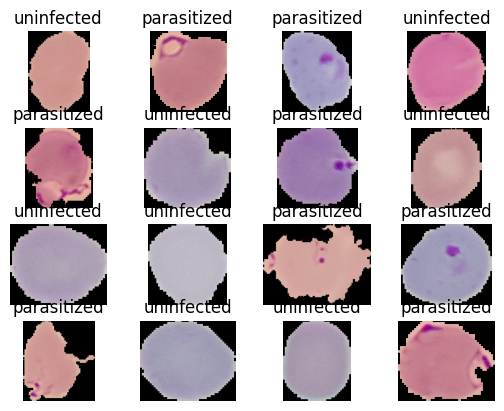

In [ ]:
for i, (image,label) in enumerate(train_dataset.take(16)):
    ax = plt.subplot(4,4,i+1)
    plt.imshow(image)
    plt.title(dataset_info.features['label'].int2str(label))
    plt.axis("off")

In [ ]:
im_size = 224

In [ ]:
image

<tf.Tensor: shape=(121, 145, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>

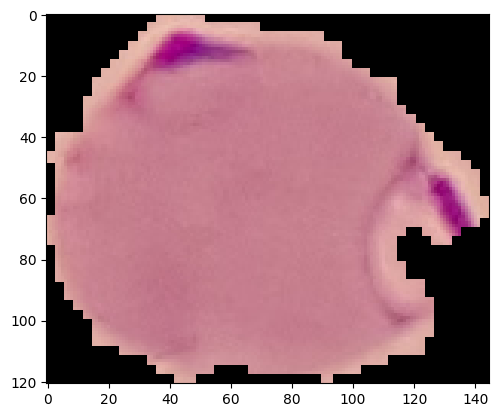

In [ ]:
plt.imshow(image)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
IM_SIZE = 224

In [ ]:
def resize_rescale(image,label):
    return tf.image.resize(image,(IM_SIZE,IM_SIZE))/255.0,label

In [ ]:
image

<module 'keras._tf_keras.keras.preprocessing.image' from '/usr/local/lib/python3.11/dist-packages/keras/_tf_keras/keras/preprocessing/image/__init__.py'>

In [ ]:
train_dataset

<_TakeDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
BATCH_SIZE = 32
train_dataset  =train_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_dataset  =val_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset  =test_dataset.map(resize_rescale).shuffle(buffer_size=8,reshuffle_each_iteration=True).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import InputLayer
from tensorflow.keras import layers

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(IM_SIZE, IM_SIZE, 3)),
    layers.Conv2D(filters=6, kernel_size=5, strides=1, padding="valid"),
    BatchNormalization(),
    layers.ReLU(),

    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Conv2D(filters=16, kernel_size=5, strides=1, padding="valid"),
    BatchNormalization(),
    layers.ReLU(),

    layers.MaxPool2D(pool_size=2, strides=2),
    layers.Flatten(),
    layers.Dense(1000),
    BatchNormalization(),
    layers.ReLU(),

    layers.Dense(100),
    BatchNormalization(),
    layers.ReLU(),

    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 220, 220, 6)    │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 220, 220, 6)    │            24 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 220, 220, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 6)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 106, 106, 16)   │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 106, 106, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 106, 106, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 44944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1000)           │    44,945,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 1000)           │         4,000 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │       100,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,052,561 (171.86 MB)

 Trainable params: 45,050,317 (171.85 MB)

 Non-trainable params: 2,244 (8.77 KB)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)


In [ ]:
history = model.fit(train_dataset,epochs=10,validation_data=val_dataset,verbose=1)

Epoch 1/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 75s 91ms/step - accuracy: 0.8136 - loss: 0.4129 - val_accuracy: 0.8512 - val_loss: 0.3684
Epoch 2/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 54ms/step - accuracy: 0.9250 - loss: 0.2138 - val_accuracy: 0.9532 - val_loss: 0.1785
Epoch 3/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 38s 55ms/step - accuracy: 0.9459 - loss: 0.1630 - val_accuracy: 0.9503 - val_loss: 0.2058
Epoch 4/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 49s 67ms/step - accuracy: 0.9554 - loss: 0.1352 - val_accuracy: 0.9492 - val_loss: 0.1619
Epoch 5/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 81s 66ms/step - accuracy: 0.9635 - loss: 0.1121 - val_accuracy: 0.9321 - val_loss: 0.2681
Epoch 6/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 37s 54ms/step - accuracy: 0.9673 - loss: 0.0960 - val_accuracy: 0.9557 - val_loss: 0.1984
Epoch 7/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 48s 70ms/step - accuracy: 0.9679 - loss: 0.0941 - val_accuracy: 0.9125 - val_loss: 0.2510
Epoch 8/10
689/689 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.9742 - loss: 0.0765 - 

In [ ]:
y_pred = model.predict(test_dataset)
y_pred

87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step


array([[9.6638323e-06],
       [9.5979804e-01],
       [9.9452400e-01],
       ...,
       [6.4438242e-01],
       [9.9577361e-01],
       [7.7124481e-05]], dtype=float32)

In [ ]:
import numpy as np
pred = np.where(y_pred>0.5,1,0)
pred

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
a = [100,3100,400,200,500,600]

In [ ]:
np.argmax(a)

np.int64(1)

In [ ]:
# accuracy_score(test_dataset,y_pred)

In [ ]:
test_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
history.history

{'accuracy': [0.8737185597419739,
  0.9292842149734497,
  0.9472466707229614,
  0.9541866779327393,
  0.9616256952285767,
  0.9667059779167175,
  0.9674317240715027,
  0.9755964875221252,
  0.979996383190155,
  0.9802685379981995],
 'loss': [0.31622686982154846,
  0.20601043105125427,
  0.1598723977804184,
  0.13778963685035706,
  0.11444985121488571,
  0.09660186618566513,
  0.092930868268013,
  0.07345768064260483,
  0.06179928407073021,
  0.05728771537542343],
 'val_accuracy': [0.8511796593666077,
  0.9531760215759277,
  0.950272262096405,
  0.9491832852363586,
  0.9321234226226807,
  0.9557169079780579,
  0.9125226736068726,
  0.9422867298126221,
  0.928856611251831,
  0.9546279311180115],
 'val_loss': [0.36841973662376404,
  0.17853932082653046,
  0.20575962960720062,
  0.16189181804656982,
  0.26808932423591614,
  0.19843703508377075,
  0.2510372996330261,
  0.21903018653392792,
  0.24048644304275513,
  0.21675509214401245]}

In [ ]:
model.evaluate(test_dataset)

87/87 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.9457 - loss: 0.2624


[0.27234727144241333, 0.9430540204048157]

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
true_labels = np.concatenate([y for x, y in test_dataset], axis=0)
print(classification_report(true_labels,pred))

              precision    recall  f1-score   support

           0       0.52      0.52      0.52      1393
           1       0.51      0.50      0.51      1364

    accuracy                           0.51      2757
   macro avg       0.51      0.51      0.51      2757
weighted avg       0.51      0.51      0.51      2757



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(true_labels,pred)

array([[724, 669],
       [677, 687]])

In [ ]:
model.count_params()

45052561

[<Mean name=loss>, <CompileMetrics name=compile_metrics>]

In [ ]:
model.save('Malaria_detection.h5')